In [2]:
import yfinance as yf
import os
import pandas as pd


In [53]:
!pip install yfinance

In [3]:
btc_ticker = yf.Ticker("BTC-USD")

In [4]:
btc = btc_ticker.history(period="max")

In [5]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-22 00:00:00+00:00,28158.720703,28803.335938,26759.996094,27307.437500,33382021890,0.0,0.0
2023-03-23 00:00:00+00:00,27301.957031,28729.843750,27183.363281,28333.972656,24220433689,0.0,0.0
2023-03-24 00:00:00+00:00,28324.111328,28388.437500,27039.265625,27493.285156,25980310960,0.0,0.0


In [6]:
btc.index = btc.index.tz_localize(None)

In [7]:
del btc["Dividends"]
del btc["Stock Splits"]

In [8]:
btc.columns = [c.lower() for c in btc.columns]

<AxesSubplot:xlabel='Date'>

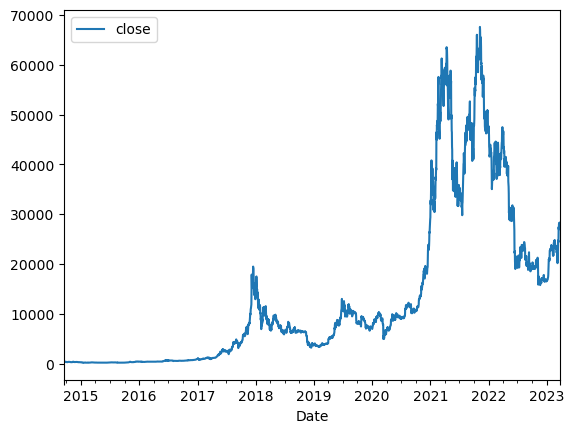

In [9]:
btc.plot.line(y="close", use_index=True)

In [10]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [11]:
btc=btc.merge(wiki, left_index=True, right_index=True)

In [12]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,3.600000,-0.210959,0.513422
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,3.266667,-0.263396,0.541993
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,3.466667,-0.228847,0.508660
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,3.400000,-0.208723,0.497549
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,3.333333,-0.195046,0.486438
...,...,...,...,...,...,...,...,...
2023-03-06,22436.816406,22584.292969,22331.314453,22429.757812,17353192895,1.200000,-0.349851,0.500000
2023-03-07,22428.322266,22527.417969,22011.261719,22219.769531,22765452204,1.200000,-0.349851,0.500000
2023-03-08,22216.441406,22268.896484,21708.050781,21718.080078,22536575684,1.066667,-0.349838,0.466667
2023-03-09,21720.080078,21802.716797,20210.306641,20363.021484,30364664171,1.066667,-0.348819,0.466667


In [13]:
btc["tomorrow"] = btc["close"].shift(-1)

In [14]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,3.600000,-0.210959,0.513422,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,3.266667,-0.263396,0.541993,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,3.466667,-0.228847,0.508660,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,3.400000,-0.208723,0.497549,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,3.333333,-0.195046,0.486438,402.152008
...,...,...,...,...,...,...,...,...,...
2023-03-06,22436.816406,22584.292969,22331.314453,22429.757812,17353192895,1.200000,-0.349851,0.500000,22219.769531
2023-03-07,22428.322266,22527.417969,22011.261719,22219.769531,22765452204,1.200000,-0.349851,0.500000,21718.080078
2023-03-08,22216.441406,22268.896484,21708.050781,21718.080078,22536575684,1.066667,-0.349838,0.466667,20363.021484
2023-03-09,21720.080078,21802.716797,20210.306641,20363.021484,30364664171,1.066667,-0.348819,0.466667,20187.244141


In [15]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [16]:
btc["target"].value_counts()

1    1647
0    1450
Name: target, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier #baseline model
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc[:-200]

predictors = ["close", "volume", "open", "high", "low", "sentiment", "edit_count", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [18]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.7825112107623319

In [19]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [20]:
def backtest(data, model, predictors, start = 1095, step = 150):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

In [21]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [22]:
precision_score(predictions["target"], predictions["predictions"])

0.508414526129318

In [23]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,3.600000,-0.210959,0.513422,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,3.266667,-0.263396,0.541993,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,3.466667,-0.228847,0.508660,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,3.400000,-0.208723,0.497549,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,3.333333,-0.195046,0.486438,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2023-03-06,22436.816406,22584.292969,22331.314453,22429.757812,17353192895,1.200000,-0.349851,0.500000,22219.769531,0
2023-03-07,22428.322266,22527.417969,22011.261719,22219.769531,22765452204,1.200000,-0.349851,0.500000,21718.080078,0
2023-03-08,22216.441406,22268.896484,21708.050781,21718.080078,22536575684,1.066667,-0.349838,0.466667,20363.021484,0
2023-03-09,21720.080078,21802.716797,20210.306641,20363.021484,30364664171,1.066667,-0.348819,0.466667,20187.244141,0


In [24]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [25]:
btc, new_predictors = compute_rolling(btc.copy())


In [26]:
predictions = backtest(btc, model, new_predictors)


In [27]:
precision_score(predictions["target"], predictions["predictions"])

0.5349065880039331

In [28]:
predictions


,target,predictions
2017-09-16,0,1
2017-09-17,1,1
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2023-03-06,0,0
2023-03-07,0,0
2023-03-08,0,1
2023-03-09,0,1


In [29]:
predictions.to_csv("predict.csv", index_label="date")

In [30]:
df=pd.read_csv("predict.csv")

In [31]:
df

,date,target,predictions
0,2017-09-16,0,1
1,2017-09-17,1,1
2,2017-09-18,0,0
3,2017-09-19,0,1
4,2017-09-20,0,1
...,...,...,...
1997,2023-03-06,0,0
1998,2023-03-07,0,0
1999,2023-03-08,0,1
2000,2023-03-09,0,1


In [32]:
df['date'] = pd.to_datetime(df['date'])

In [33]:
# Set date column as index
df.set_index('date', inplace=True)

# Calculate rolling averages for weekly, biweekly and monthly periods
weekly_avg = df['predictions'].rolling('7D').mean()
biweekly_avg = df['predictions'].rolling('14D').mean()
monthly_avg = df['predictions'].rolling('30D').mean()

In [34]:
weekly_avg

date
2017-09-16    1.000000
2017-09-17    1.000000
2017-09-18    0.666667
2017-09-19    0.750000
2017-09-20    0.800000
                ...   
2023-03-06    0.428571
2023-03-07    0.285714
2023-03-08    0.428571
2023-03-09    0.428571
2023-03-10    0.428571
Name: predictions, Length: 2002, dtype: float64

In [35]:
monthly_avg

date
2017-09-16    1.000000
2017-09-17    1.000000
2017-09-18    0.666667
2017-09-19    0.750000
2017-09-20    0.800000
                ...   
2023-03-06    0.666667
2023-03-07    0.633333
2023-03-08    0.633333
2023-03-09    0.633333
2023-03-10    0.633333
Name: predictions, Length: 2002, dtype: float64